In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def plotNorm(fun, ax):
    X = np.arange(0, 1.01, 0.01)
    Y = np.arange(0, 1.01, 0.01)
    Z = np.array([np.array([fun(x,y) for x in X]) for y in Y] )
    X, Y = np.meshgrid(X, Y)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, antialiased=True)

    ax.set_zlim(-0.1, 1.1)
    ax.zaxis.set_major_locator(LinearLocator(11))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.view_init(elev=20, azim=250)



In [3]:
def plotNorms(fun1, fun2):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121,projection='3d')
    ax2 = fig.add_subplot(122,projection='3d')
    
    plotNorm(fun1, ax1)
    plotNorm(fun2, ax2)
   
    plt.show()

<H1>Zadeh t-norm</H1>

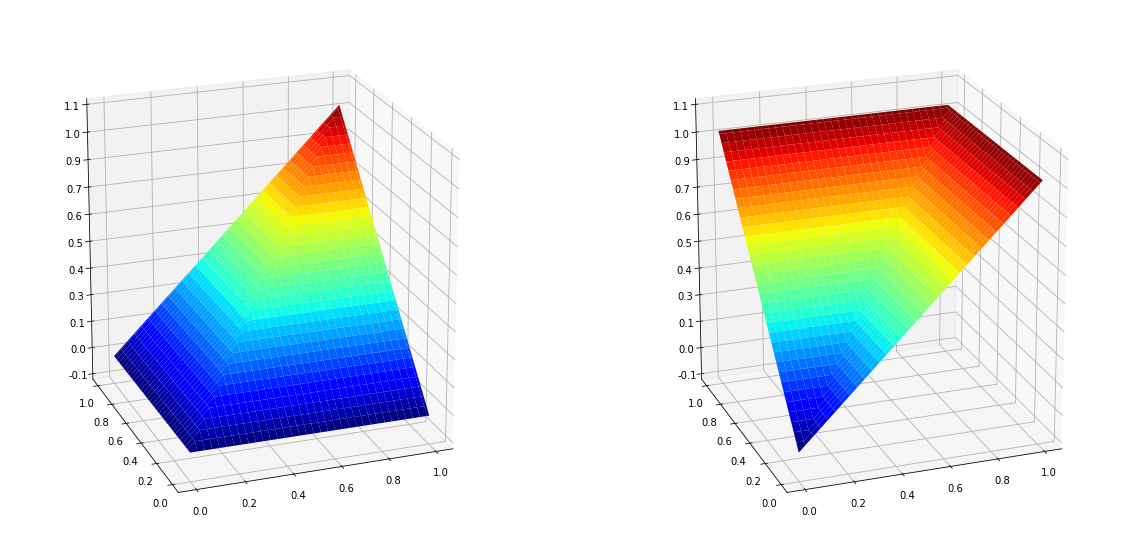

In [4]:
def zadeh_t(x,y):
    return min(x,y)
def zadeh_s(x,y):
    return max(x,y)
plotNorms(zadeh_t,zadeh_s)

<H1>Algebraic t-norm</H1>

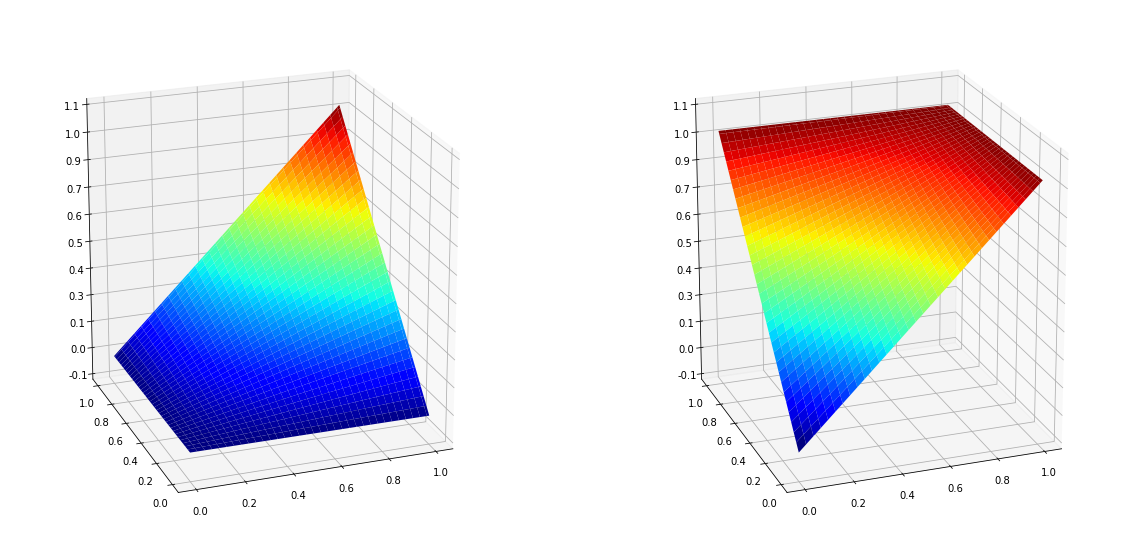

In [5]:
def algebraic_t(x,y):
    return x*y
def probabilistic_s(x,y):
    return x+y-x*y
plotNorms(algebraic_t,probabilistic_s)

<H1>Łukasiewicz t-norm</H1>

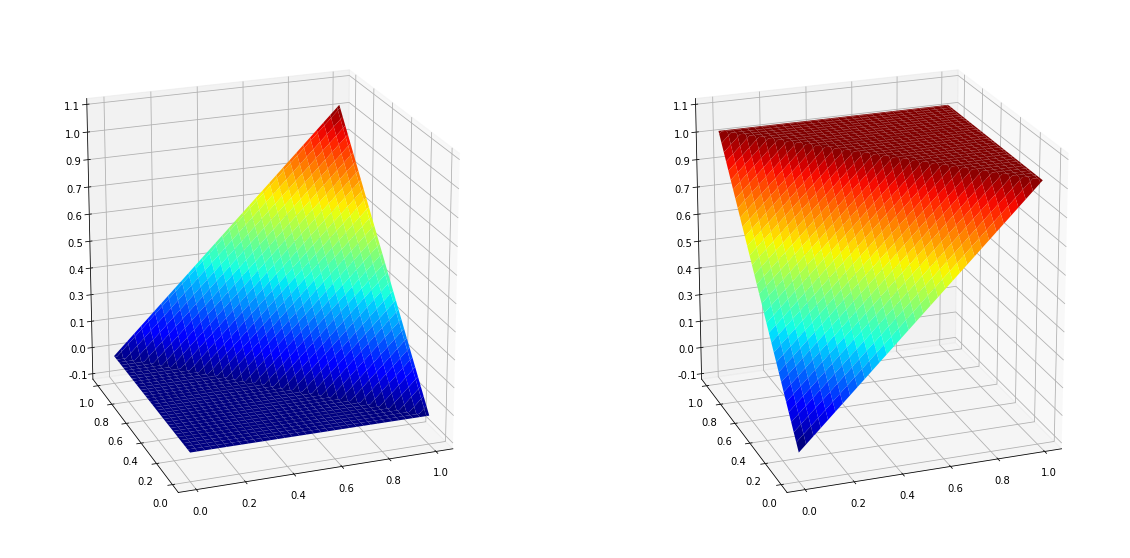

In [6]:
def lukasiewicz_t(x,y):
    return max(x+y-1.0,0)
def lukasiewicz_s(x,y):
    return min(x+y,1)
plotNorms(lukasiewicz_t,lukasiewicz_s)

<H1>Fodor t-norm</H1>

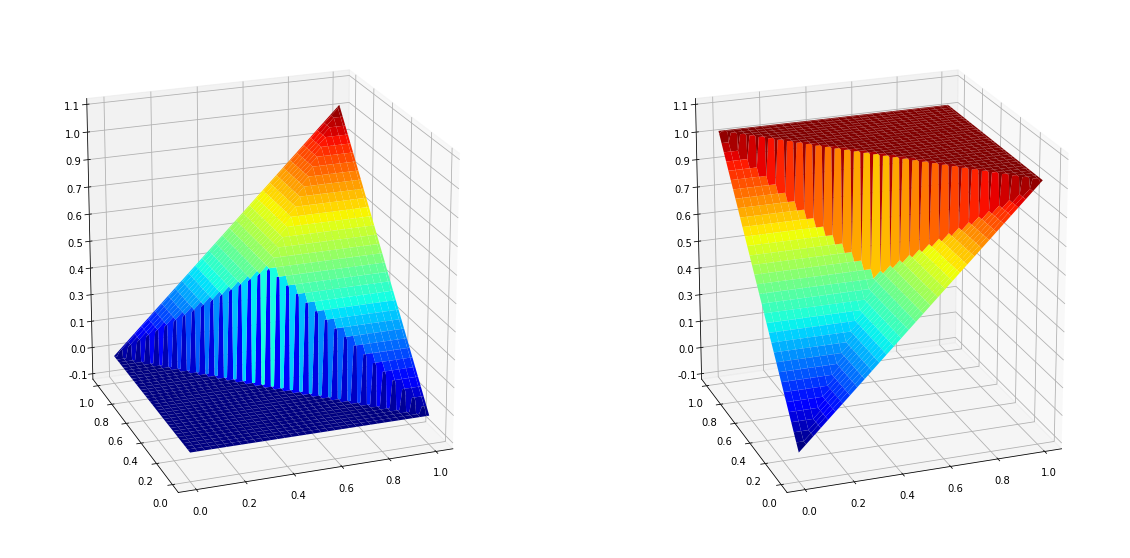

In [7]:
def fodor_t(x,y):
    if x+y>1:
        return min(x,y)
    else:
        return 0
def fodor_s(x,y):
    if x+y<1:
        return max(x,y)
    else:
        return 1
plotNorms(fodor_t,fodor_s)

<H1>Drastic t-norm</H1>

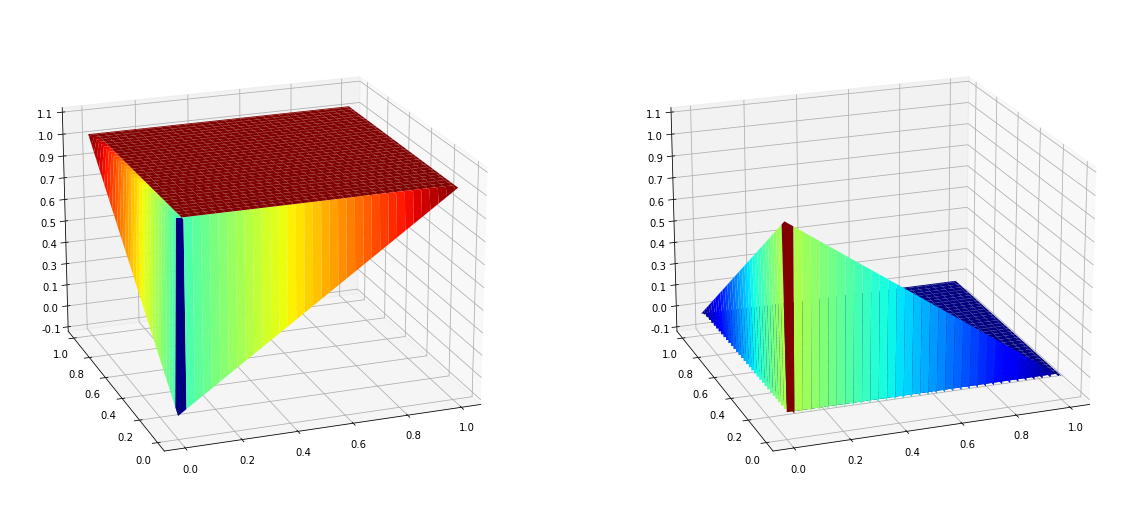

In [5]:
def drastic_t(x, y):
    args = np.array([x, y])
    a, b = args
    return np.select([a == 0, b == 0], [b, a], default=1)

def drastic_s(x, y):
    return 1 - drastic_t(x, y)

plotNorms(drastic_t,drastic_s)

<H1>Einstein t-norm</H1>

\begin{equation*}
E(x,y)=\frac{xy}{2-(x+y-xy)}     \quad\quad\quad\quad     E'(x,y)=\frac{x+y}{1+xy}
\end{equation*}

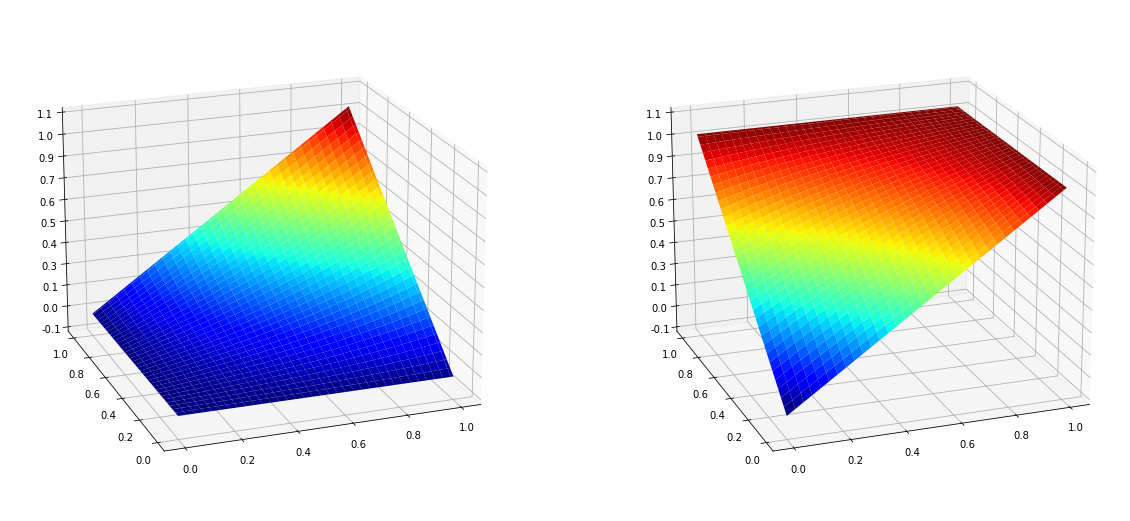

In [6]:
def einstein_t(x, y):
    args = np.array([x, y])
    num = np.product(args, axis=0)
    denom = 2 - ( np.sum(args, axis=0) - num )
    return num / denom

def einstein_s(x, y):
    args = np.array([x, y])
    num = np.sum(args, axis=0)
    denom = 1 + np.product(args, axis=0)
    return num / denom

plotNorms(einstein_t,einstein_s)

/var/folders/tx/f926c4c92_3c8ybrxl92vnqw0000gp/T/ipykernel_88451/1860943388.py:4: RuntimeWarning: invalid value encountered in double_scalars
  values = (x * y) / (x + y - x * y)


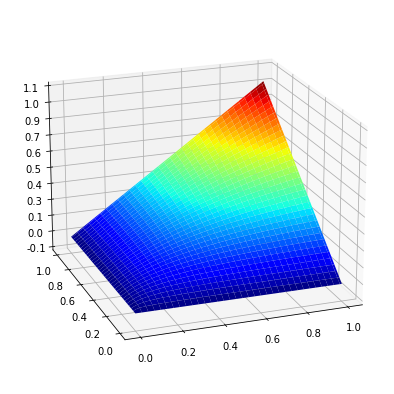

In [17]:
def hamacher_product(x, y):
    zeros = np.zeros_like(x)
    condition = np.logical_and(x == 0, y == 0)
    values = (x * y) / (x + y - x * y)
    return np.where(condition, zeros, values)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(121,projection='3d')

plotNorm(hamacher_product, ax1)